## Exploratory data analysis of the fragments

In [4]:
import os
import gc
import glob
import json
from collections import defaultdict
import multiprocessing as mp
from pathlib import Path
from types import SimpleNamespace
from typing import Dict, List, Optional, Tuple
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import PIL.Image as Image
from sklearn.metrics import fbeta_score
from sklearn.exceptions import UndefinedMetricWarning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from tqdm import tqdm
import memory_profiler

In [2]:
PREFIX= 'kaggle//input//vesuvius-challenge//train//' 
BUFFER = 30  # Buffer size in x and y direction
Z_START = 16 # First slice in the z direction to use
Z_DIM = 32   # Number of slices in the z direction
TRAINING_EPOCHS = 20000
VALIDATION_EPOCHS= 500
LEARNING_RATE = 0.03
BATCH_SIZE = 32
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
rectangle=[(1100, 3500, 700, 950),(1000, 1000, 1200, 1200),(1500, 2500, 1200, 1200)] # Put the correct coordinates for the rectangle

In [3]:
collected = gc.collect()
 
# Prints Garbage collector
# as 0 object
print("Garbage collector: collected",
          "%d objects." % collected)

Garbage collector: collected 42 objects.


Garbage collector: collected 21899 objects.


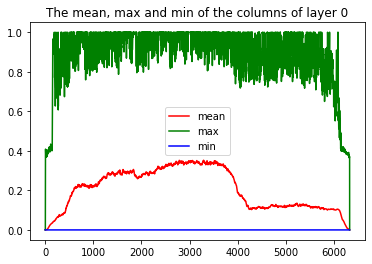

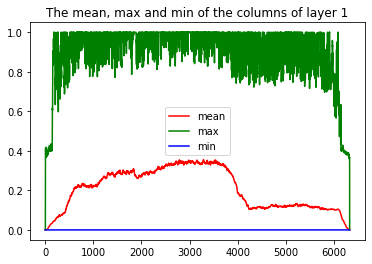

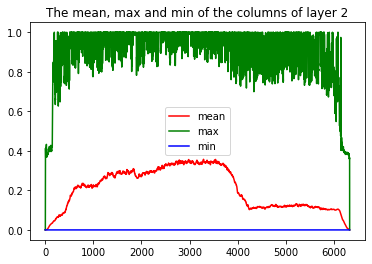

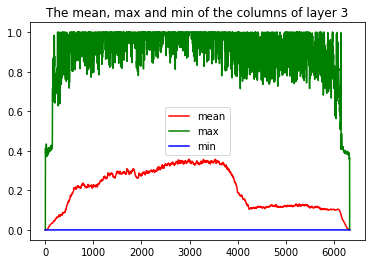

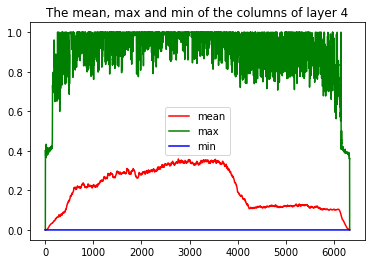

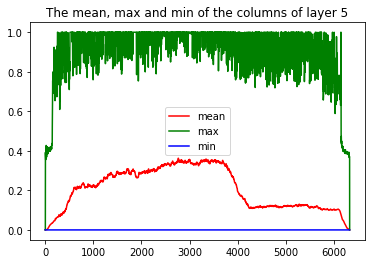

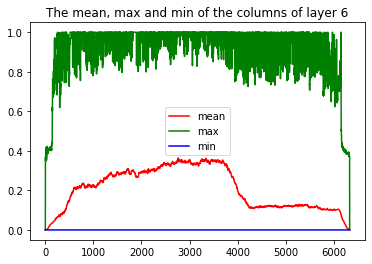

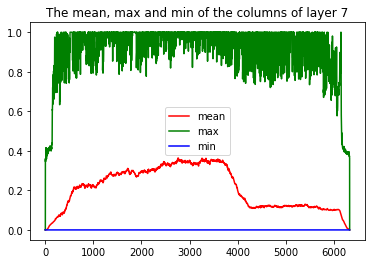

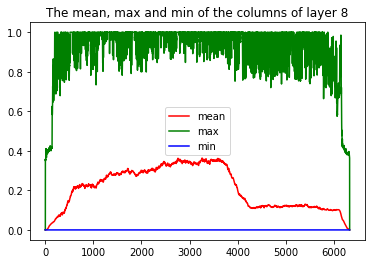

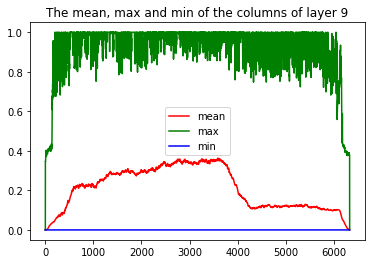

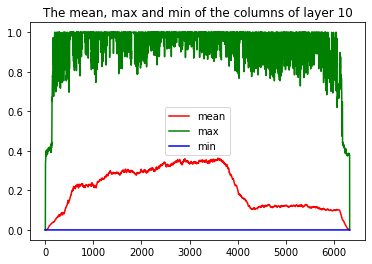

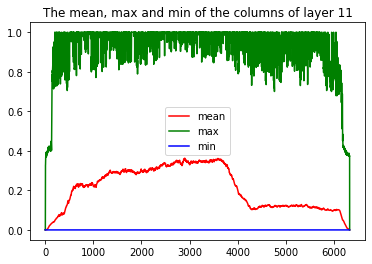

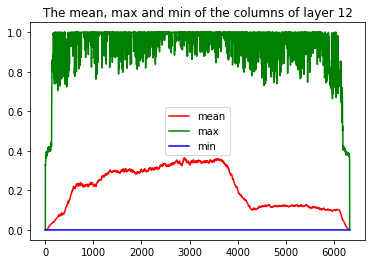

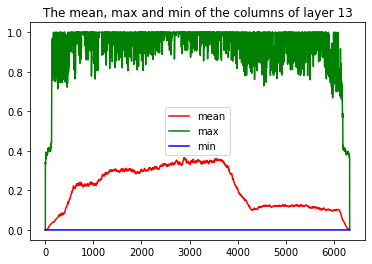

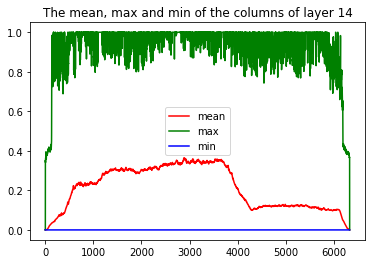

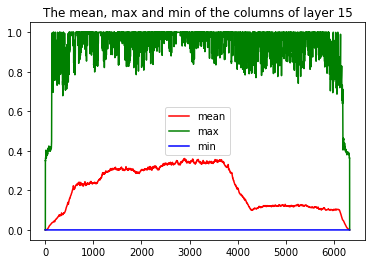

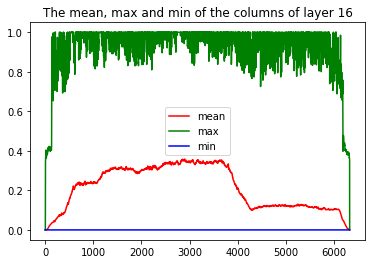

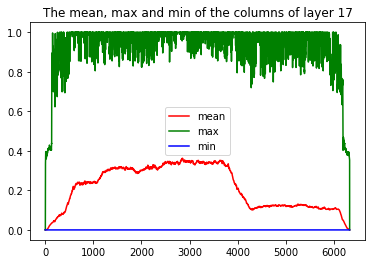

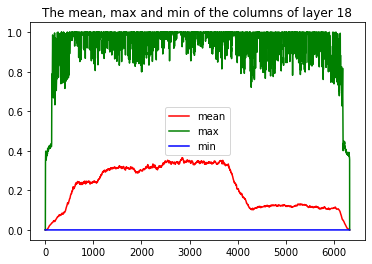

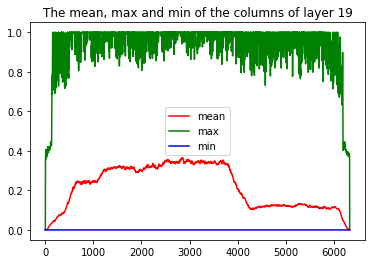

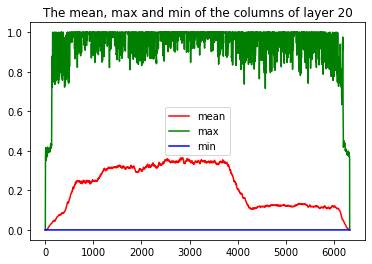

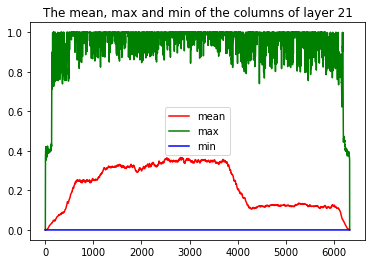

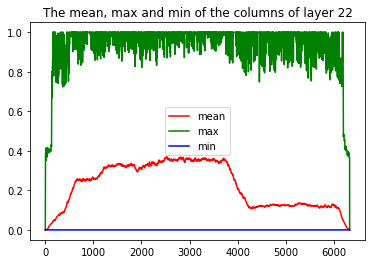

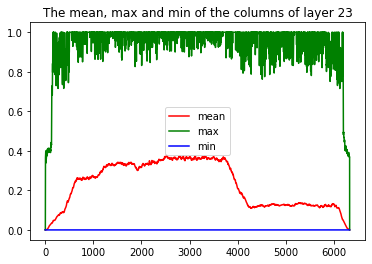

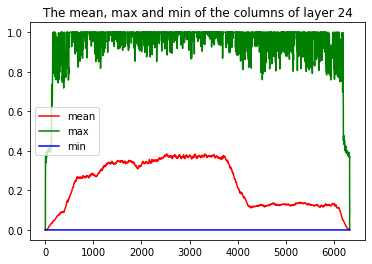

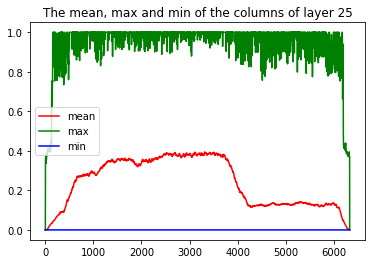

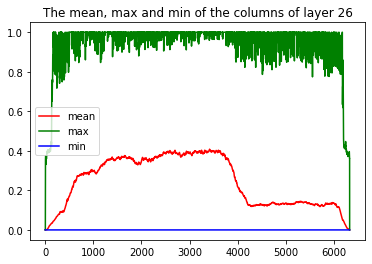

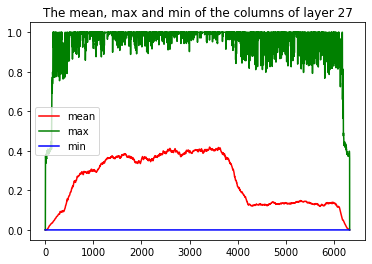

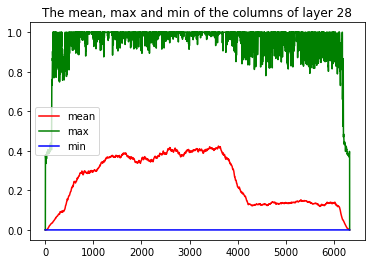

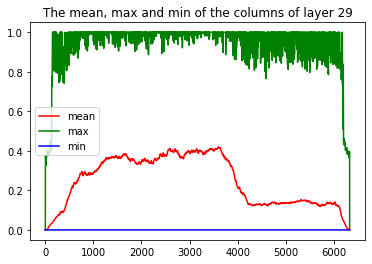

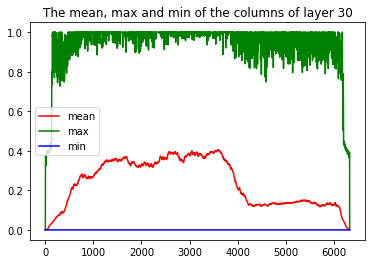

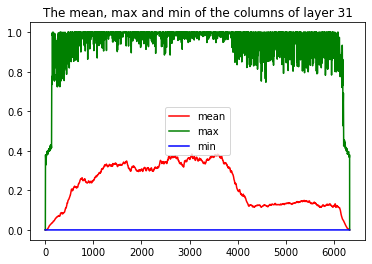

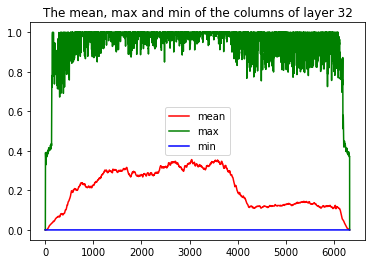

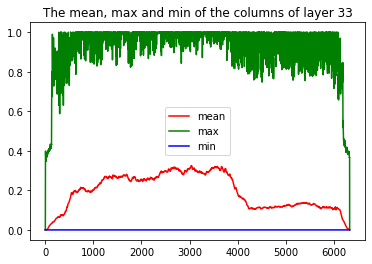

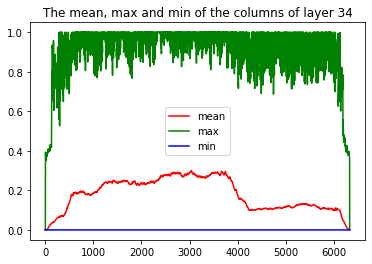

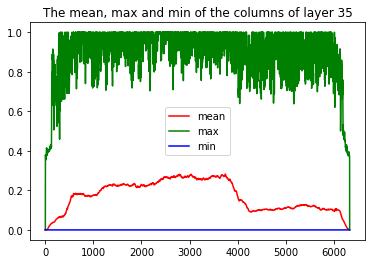

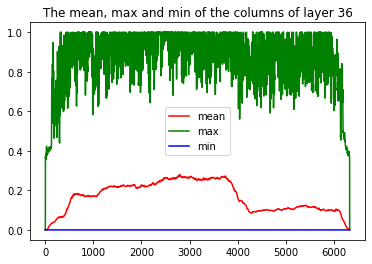

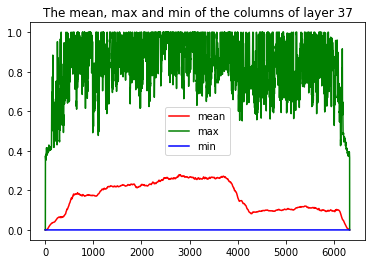

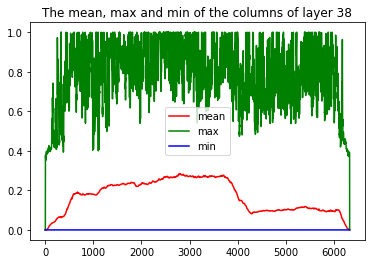

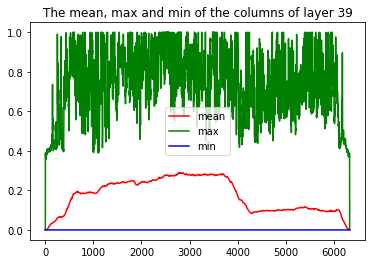

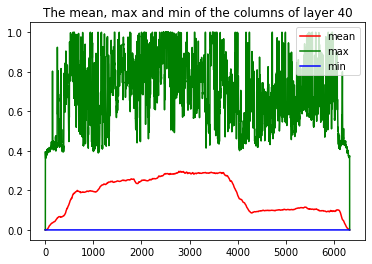

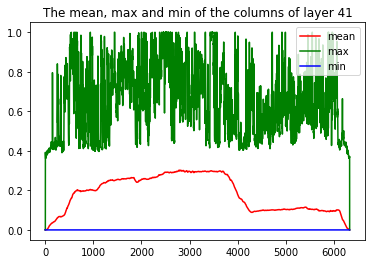

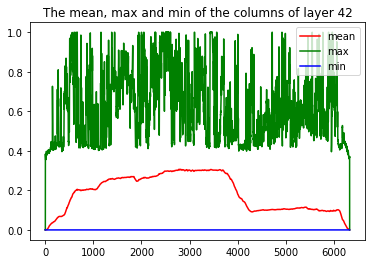

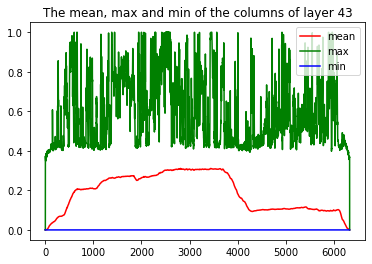

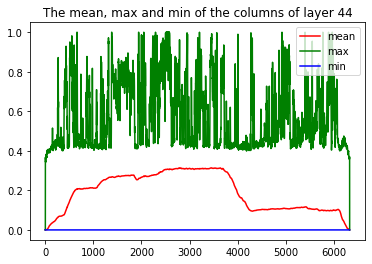

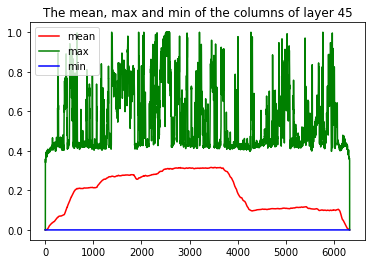

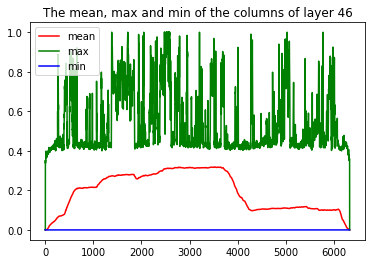

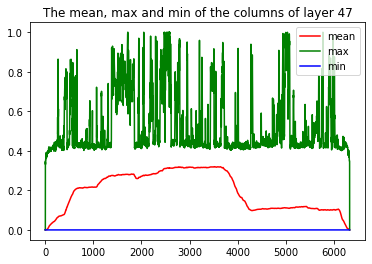

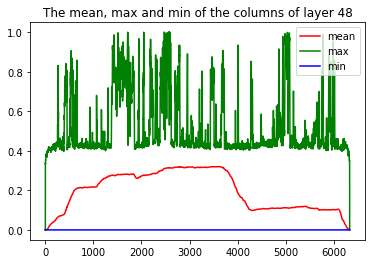

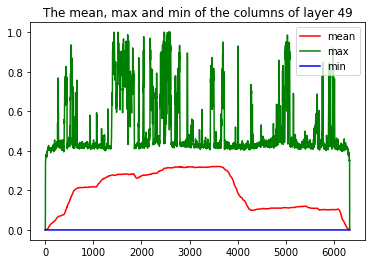

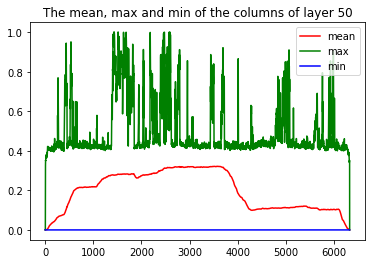

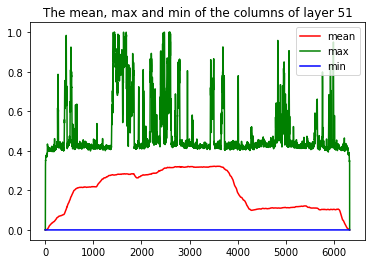

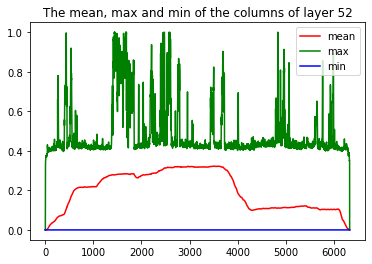

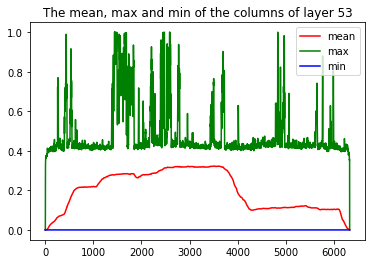

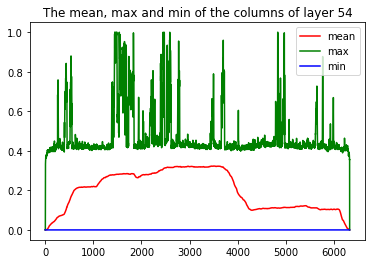

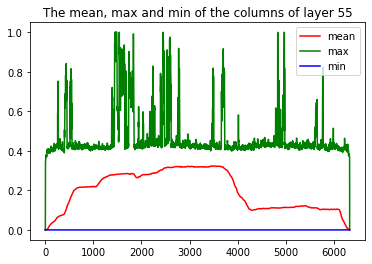

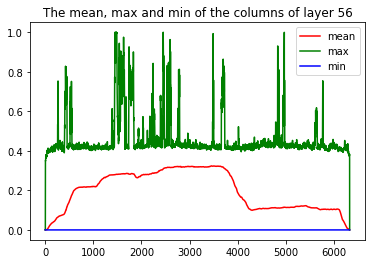

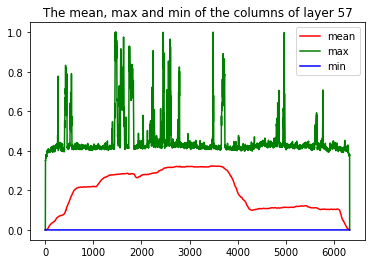

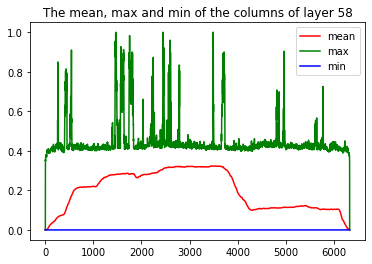

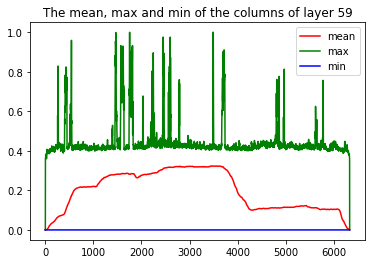

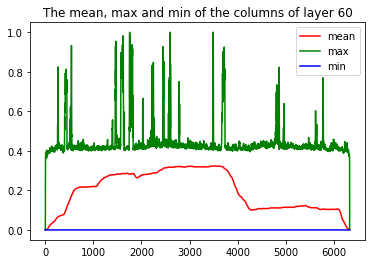

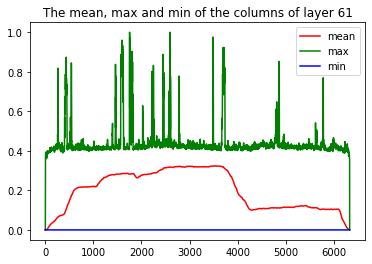

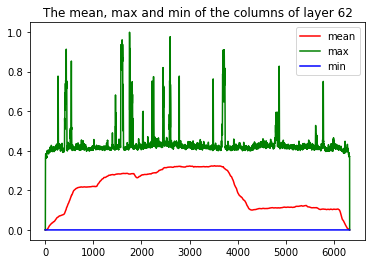

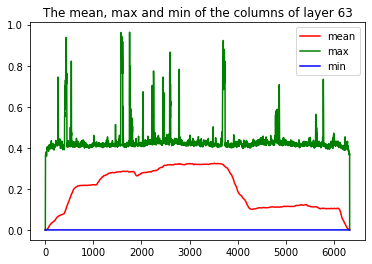

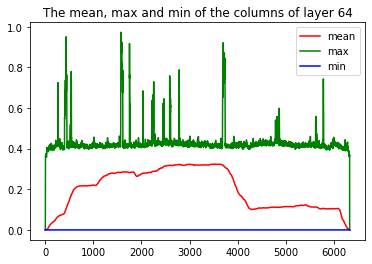

Garbage collector: collected 37740 objects.


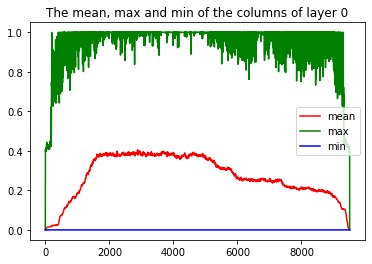

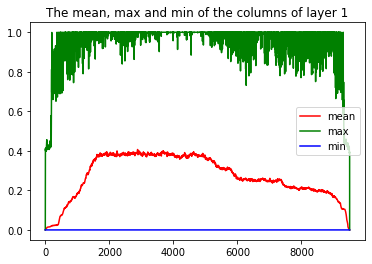

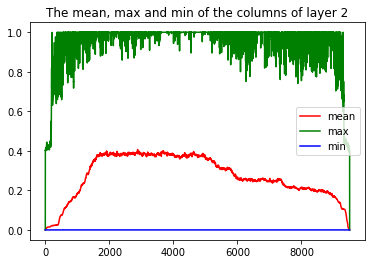

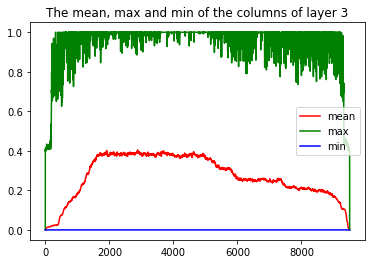

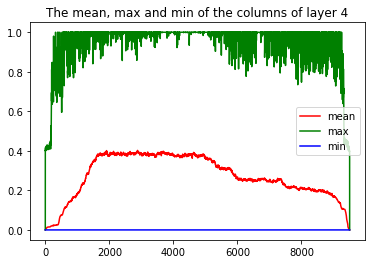

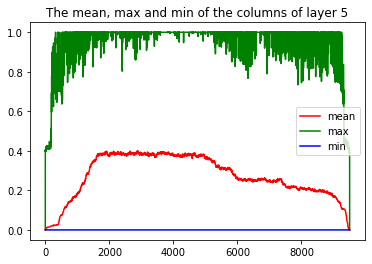

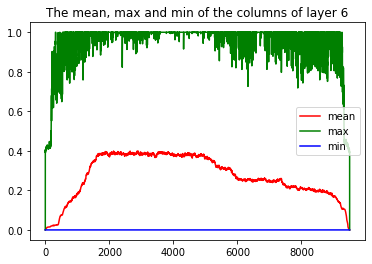

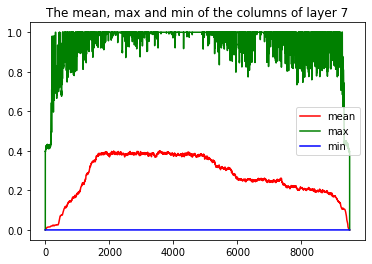

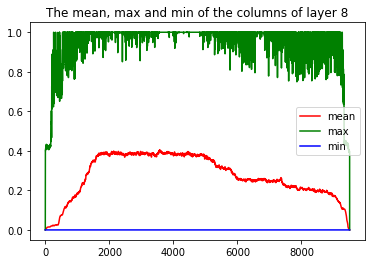

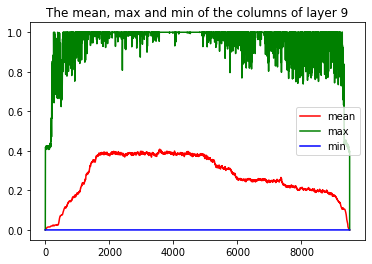

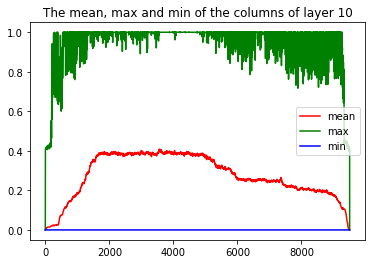

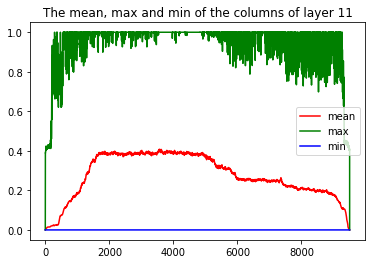

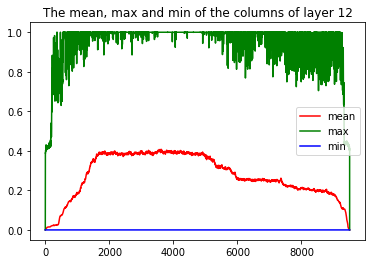

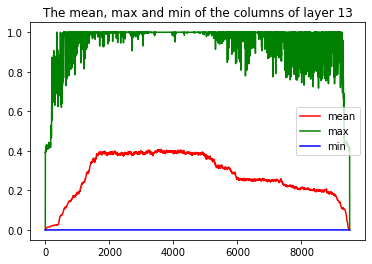

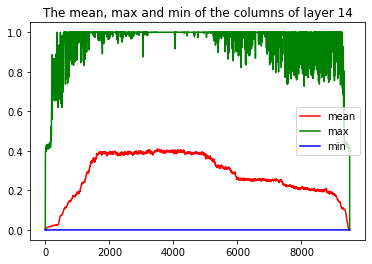

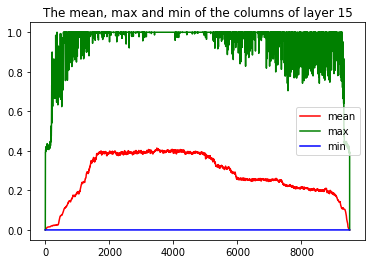

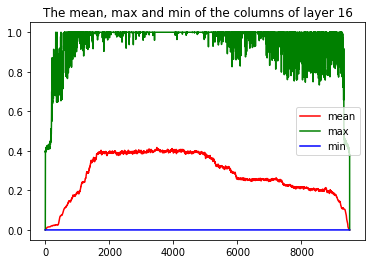

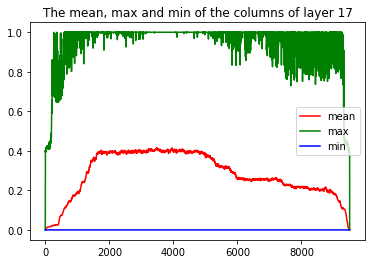

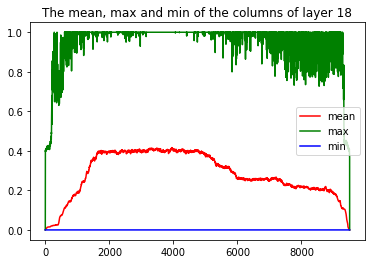

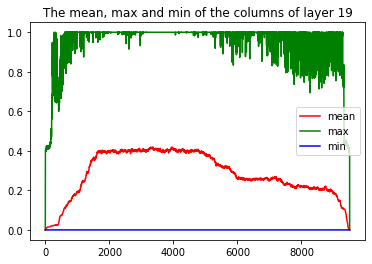

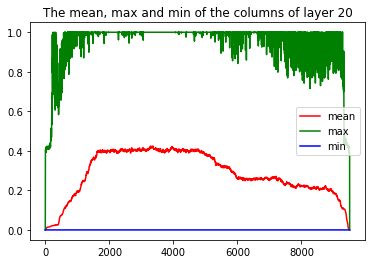

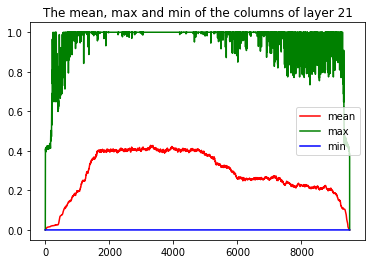

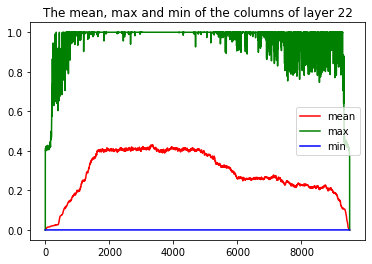

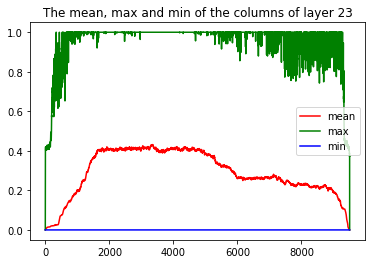

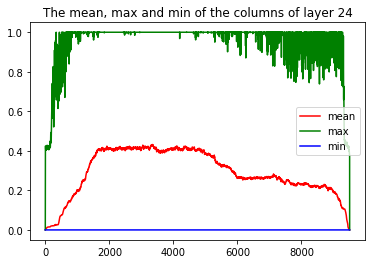

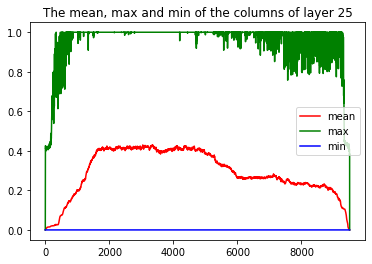

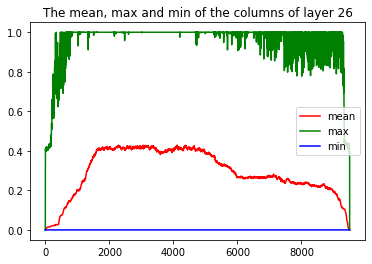

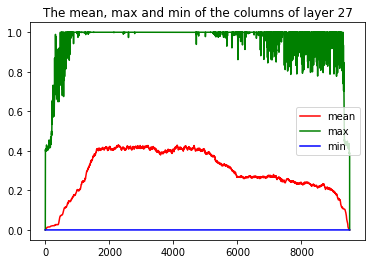

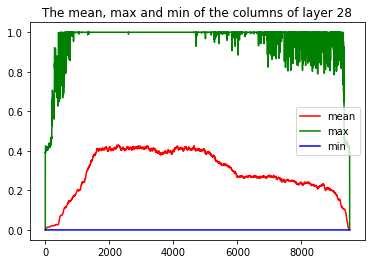

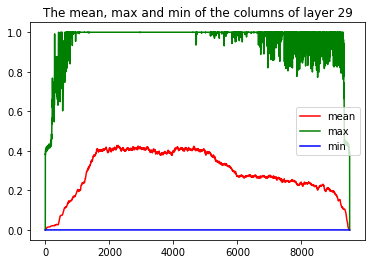

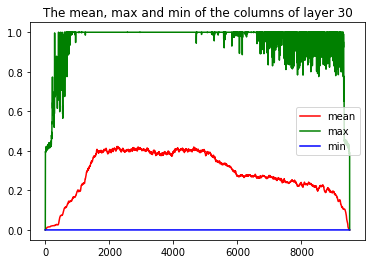

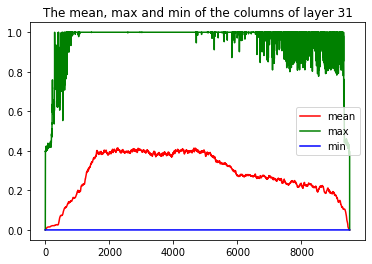

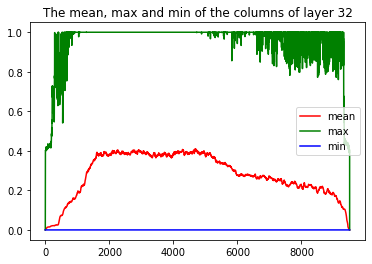

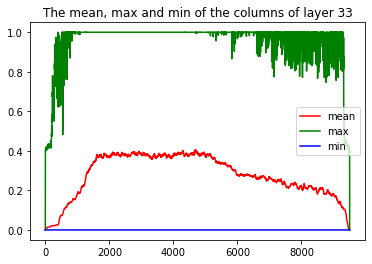

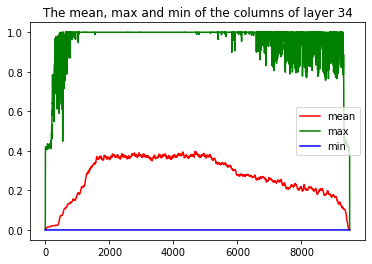

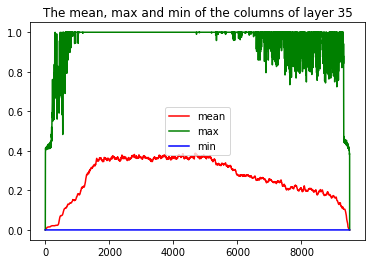

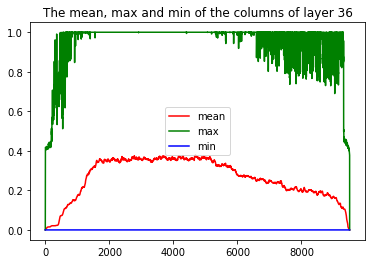

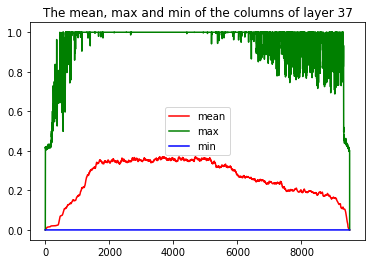

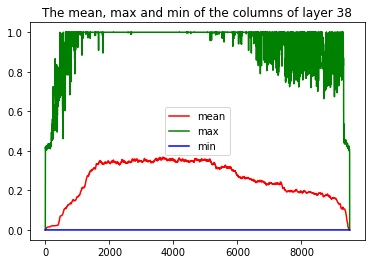

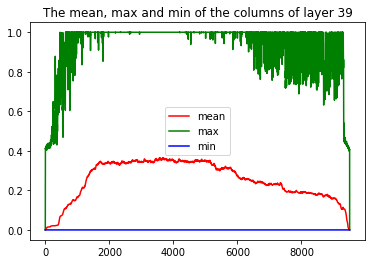

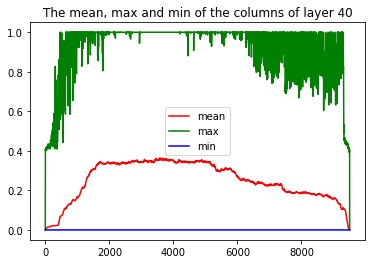

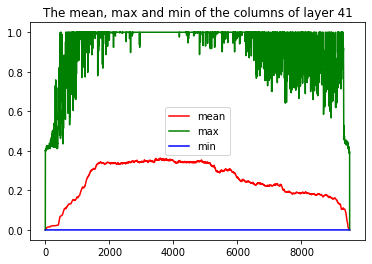

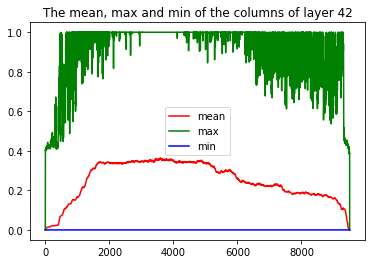

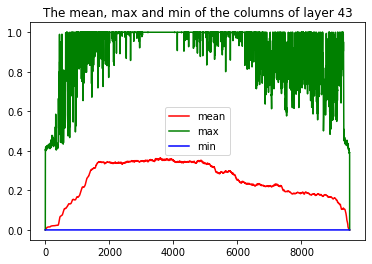

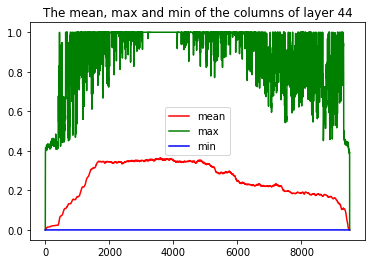

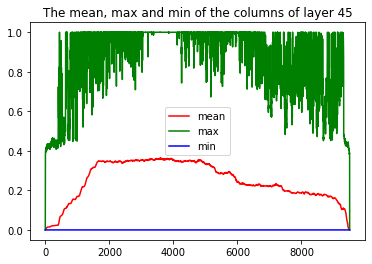

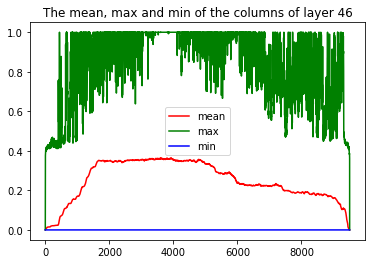

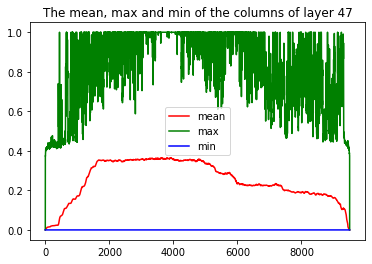

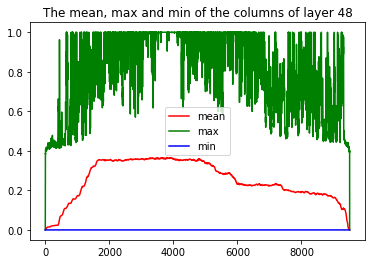

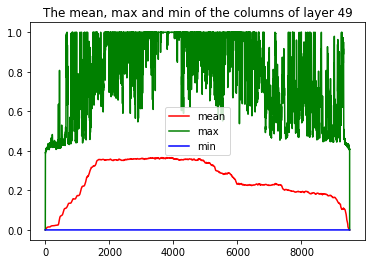

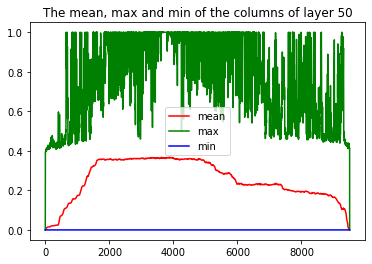

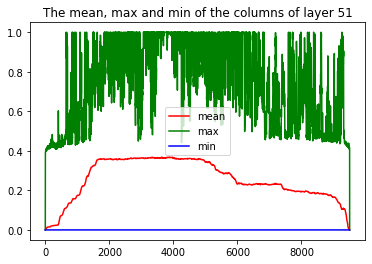

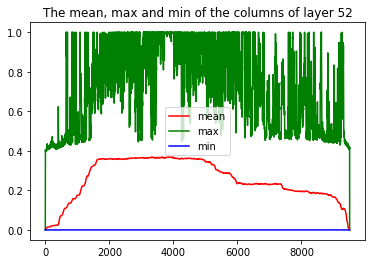

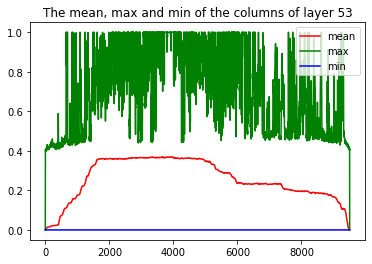

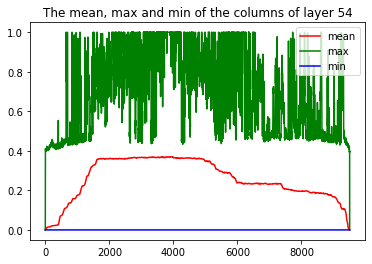

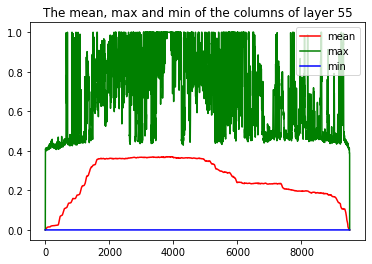

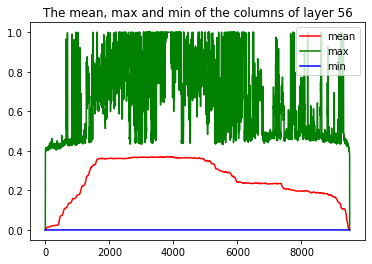

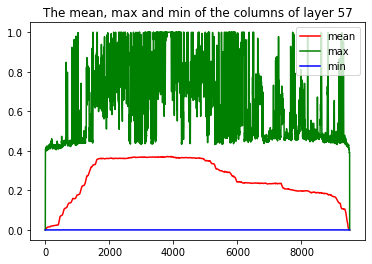

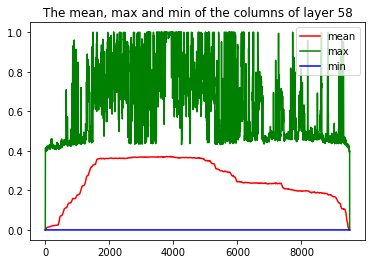

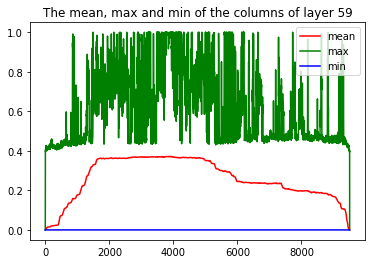

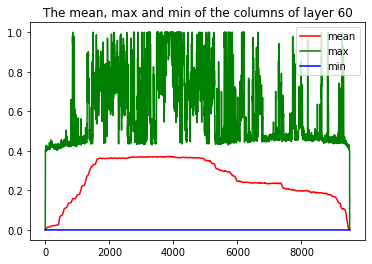

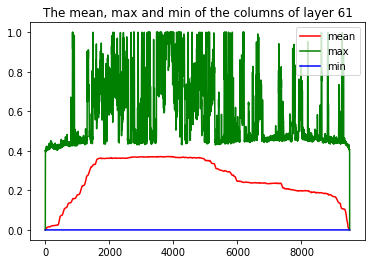

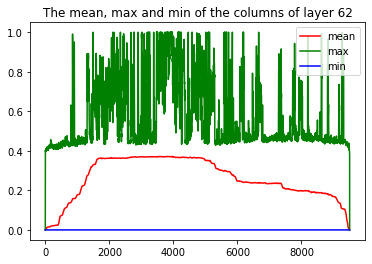

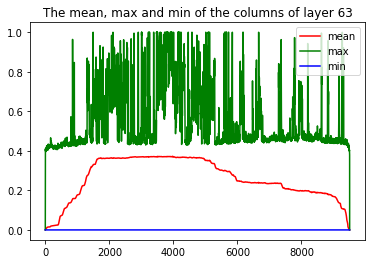

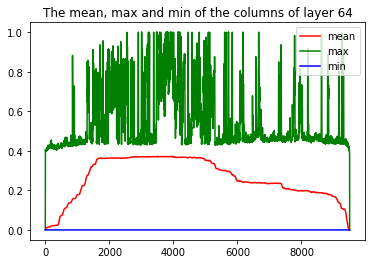

Garbage collector: collected 18105 objects.


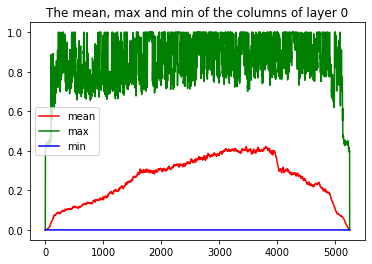

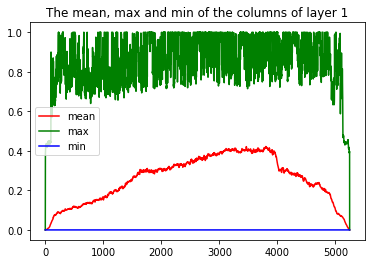

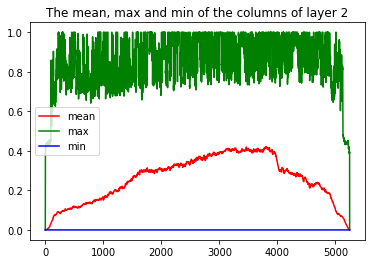

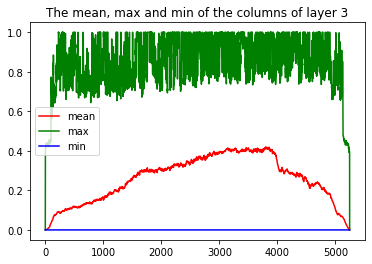

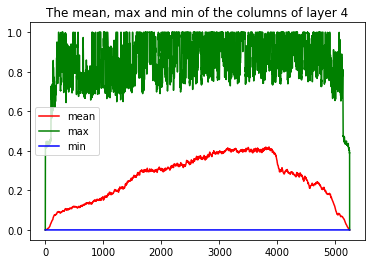

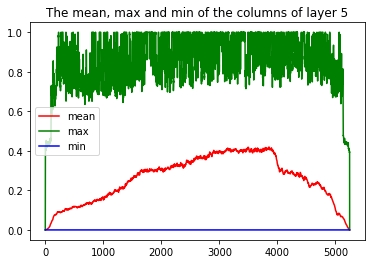

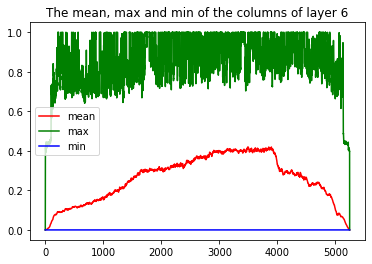

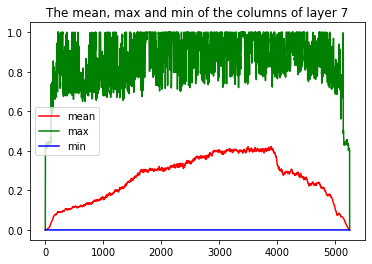

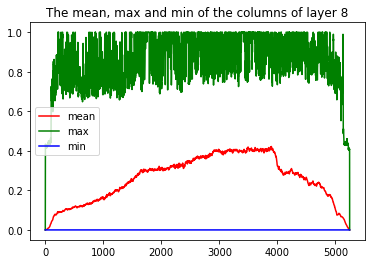

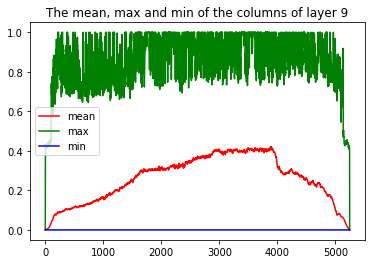

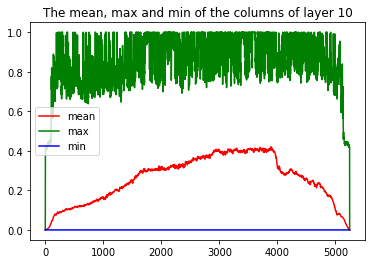

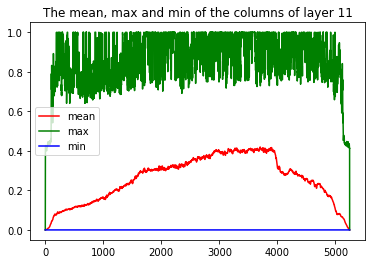

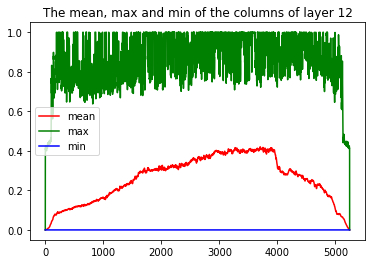

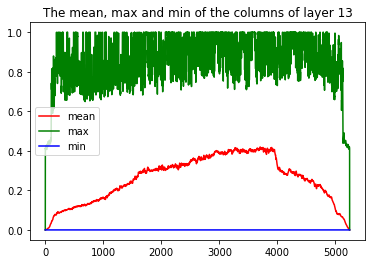

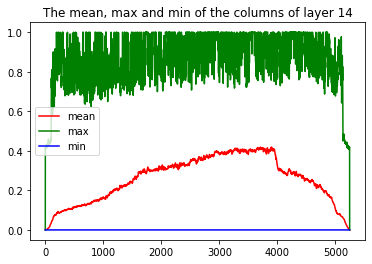

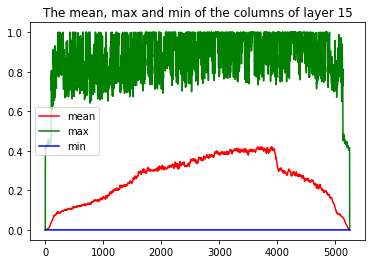

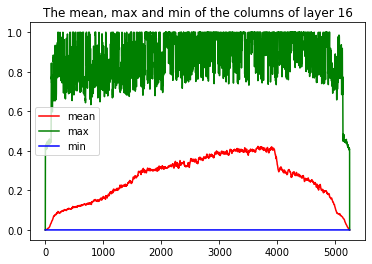

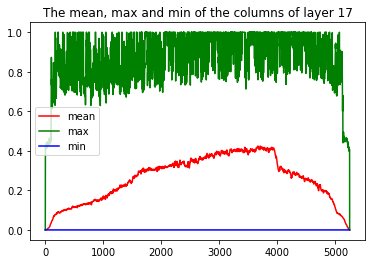

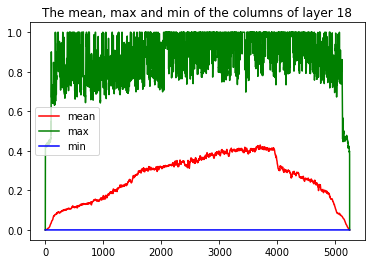

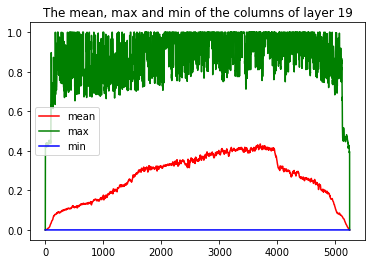

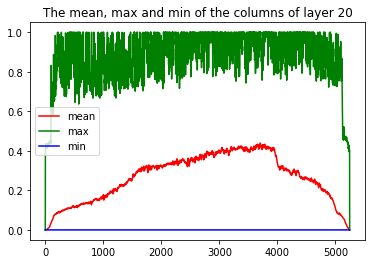

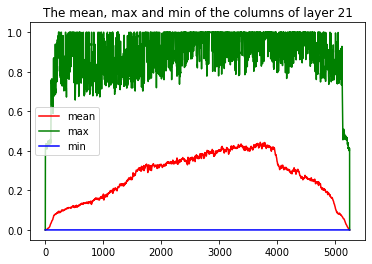

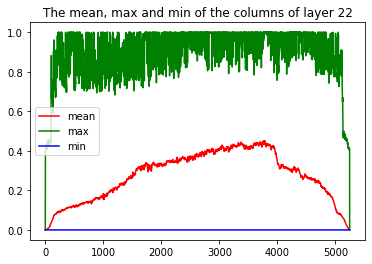

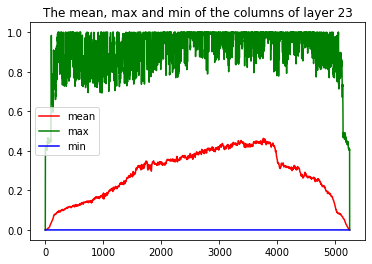

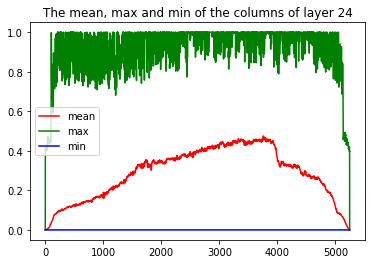

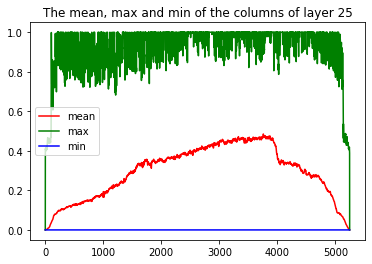

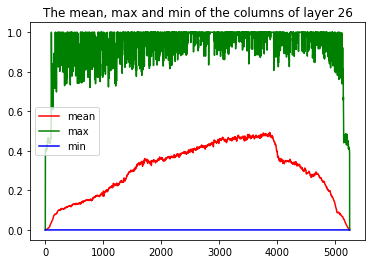

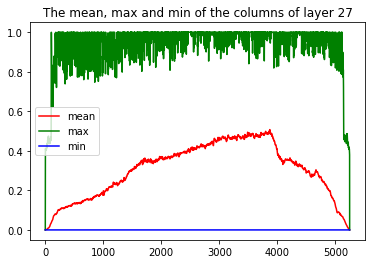

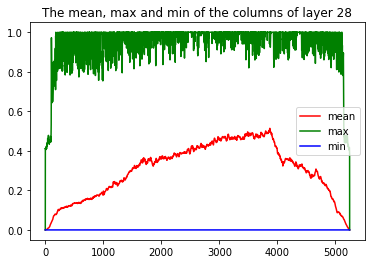

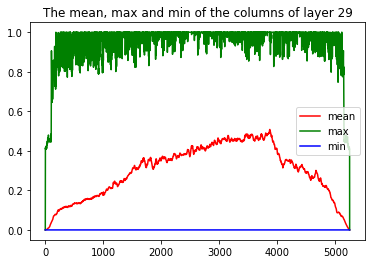

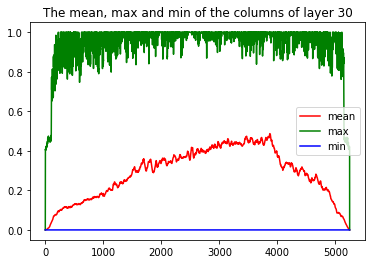

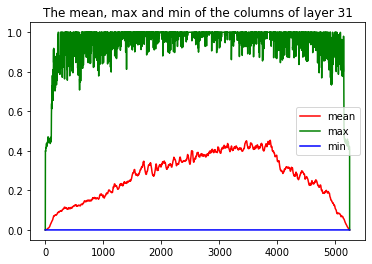

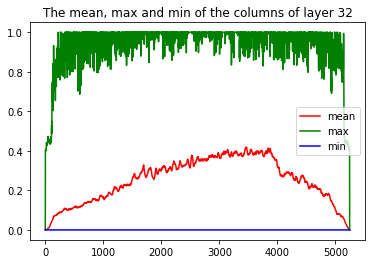

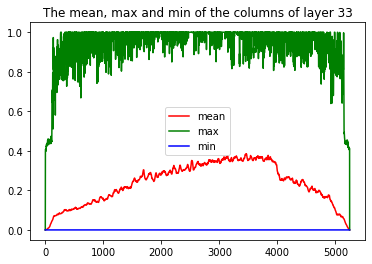

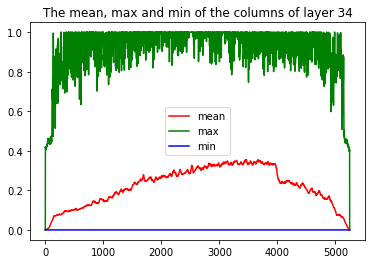

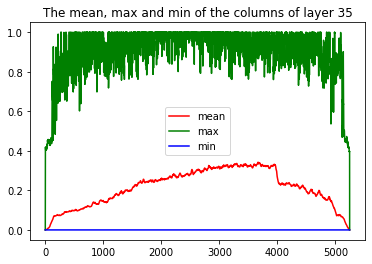

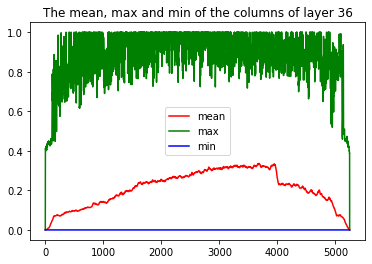

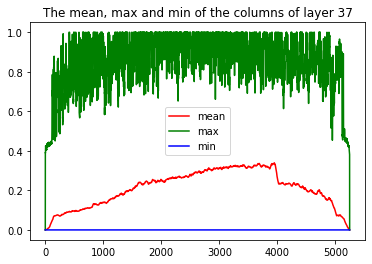

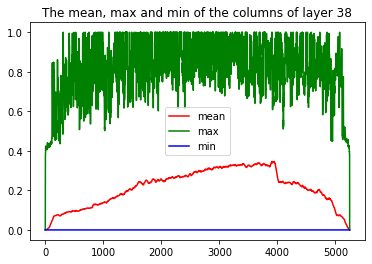

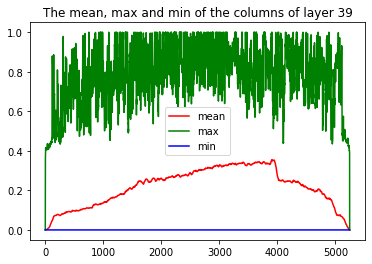

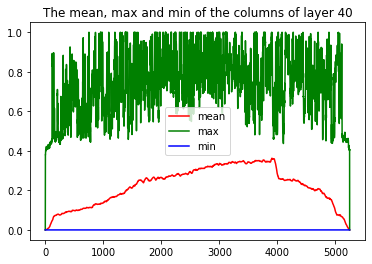

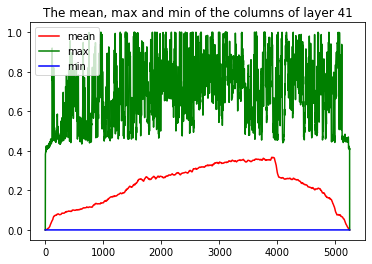

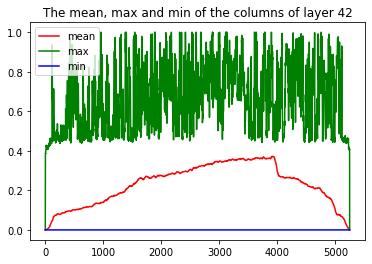

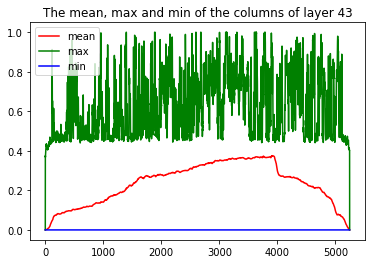

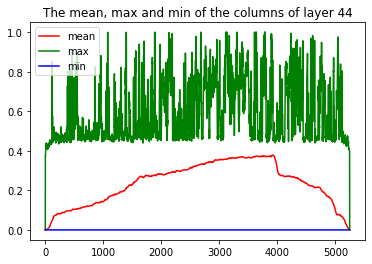

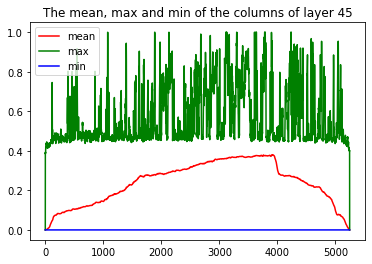

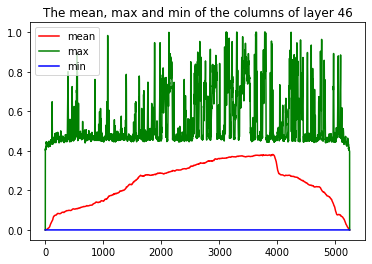

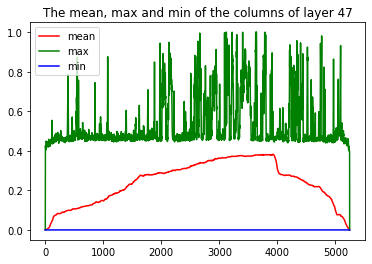

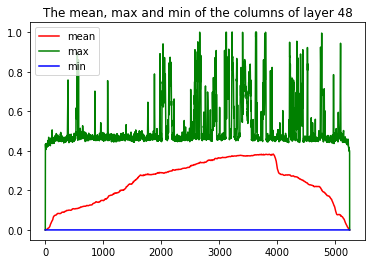

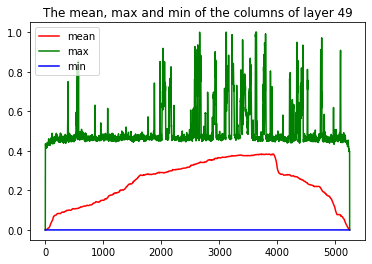

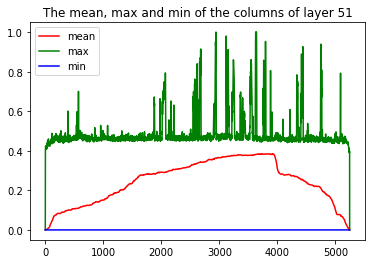

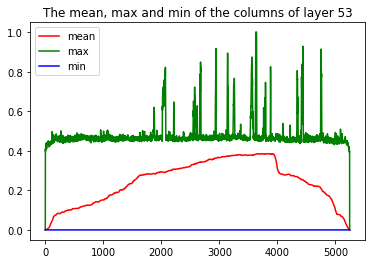

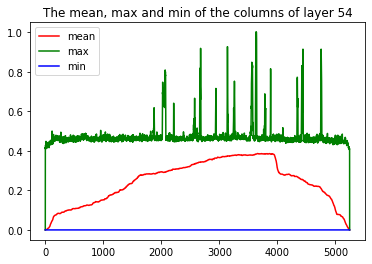

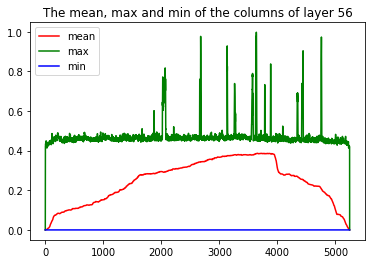

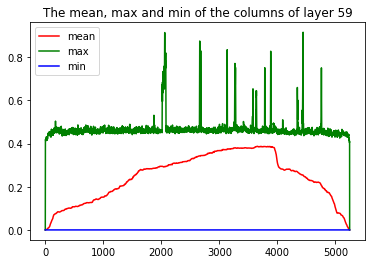

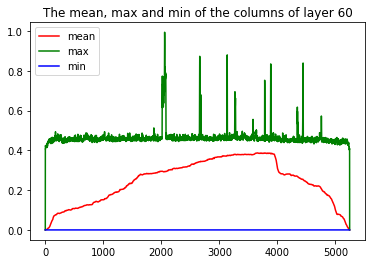

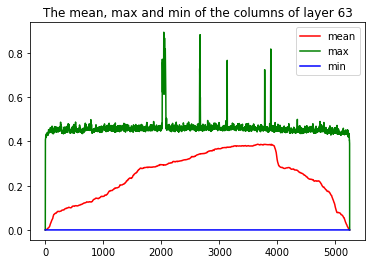

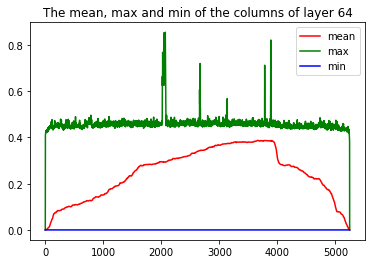

In [7]:
for j in range(1,4):
    i=0
    os.makedirs(f"frag{str(j)}")
    collected = gc.collect()
    print("Garbage collector: collected",
          "%d objects." % collected)
    for filename in sorted(glob.glob(PREFIX+ str(j)+ "//surface_volume/*.tif")):
        df=pd.DataFrame(np.array(Image.open(filename), dtype=np.float32)/65535.0)
        df_mean=df.mean(axis=0)
        df_max=df.max(axis=0)
        df_min=df.min(axis=0)
        plt.plot(df_mean, color='r', label='mean')
        plt.plot(df_max, color='g', label='max')
        plt.plot(df_min, color='b',label="min")
        plt.legend()
        plt.title(f"The mean, max and min of the columns of layer {i}")
        plt.savefig(f"frag{str(j)}/{str(i).zfill(2)}.png")
        plt.show()
        i=i+1